<a href="https://colab.research.google.com/github/karthiksuki/IPL/blob/main/IPL_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
matches = pd.read_csv('matches.csv')

In [ ]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
matches.shape

(756, 18)

In [ ]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

To find the number of NaN values we use `isna` module we use `sum` to find the sum of NaN  

In [ ]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Replacing NaN to 0 

In [ ]:
matches['city'].replace(np.NaN,'0',inplace=True)
matches['winner'].replace(np.NaN,'0',inplace=True)
matches['umpire1'].replace(np.NaN,'0',inplace=True)
matches['umpire2'].replace(np.NaN,'0',inplace=True)
matches['umpire3'].replace(np.NaN,'0',inplace=True)
matches['player_of_match'].replace(np.NaN,'0',inplace=True)

Let's check for NaN values.

In [ ]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

Ahhh! We change `NaN` to `0` 
Let's start analyse our data. 

Let's replace big name with short ones to analyse more sufficently

In [ ]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
matches.fillna(np.NaN)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,2017-04-08,RCB,Delhi Daredevils,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,SRH,DD,DD,field,normal,0,DD,0,2,RR Pant,ACA-VDCA Stadium,0,0,0
754,11414,2019,Visakhapatnam,10/05/19,DD,CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


Toss win by different teams

In [ ]:
toss_won = matches['toss_winner'].value_counts()
print('Most Tosses won by; \n') 
toss_win

Most Tosses won by; 



MI      98
KKR     92
DD      90
CSK     89
RCB     81
KXIP    81
RR      80
SRH     46
DC      43
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

It's seems MI (Mumbai Indians) won most tosses.


Let's see who won more matches

In [ ]:
matches_won = matches['winner'].value_counts()
print('Most matches won by: \n')
matches_won

Most matches won by: 



MI                  109
CSK                 100
KKR                  92
RCB                  84
KXIP                 82
RR                   75
Delhi Daredevils     67
SRH                  58
DC                   29
RPS                  15
GL                   13
PW                   12
DD                   10
KTK                   6
0                     4
Name: winner, dtype: int64

Let's see toss winning statistics

In [ ]:
teams_toss = matches['toss_winner'].value_counts().index.tolist()
teams_winner = matches['winner'].value_counts().index.tolist()

Text(0.5, 1.0, 'TOSS WINNING STATISTICS')

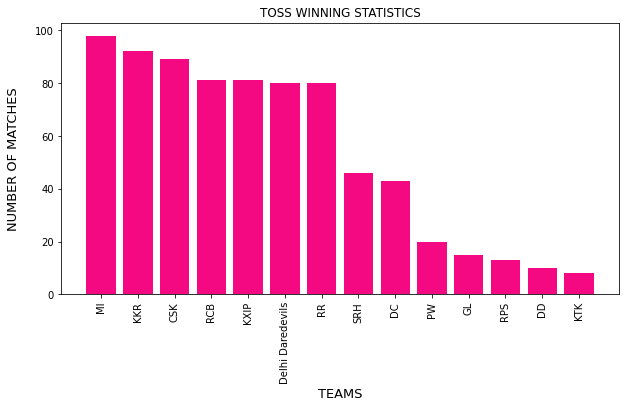

In [ ]:
#toss winning statistics
plt.figure(figsize=(10,5))
plt.bar(teams_toss,toss_won,color='#F50982')
plt.xticks(rotation=90)
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.xlabel('TEAMS',fontsize=13)
plt.ylabel('NUMBER OF MATCHES',labelpad=15,fontsize=13)
plt.title('TOSS WINNING STATISTICS')

Text(0.5, 1.0, 'MATCH WINNING STATISTICS')

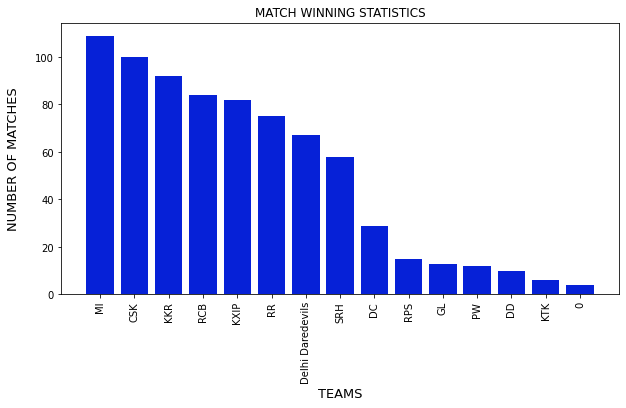

In [ ]:
#match winning statistics
plt.figure(figsize=(10,5))
plt.bar(teams_winner,matches_won,color='#0621D7')
plt.xticks(rotation=90)
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.xlabel('TEAMS',fontsize=13)
plt.ylabel('NUMBER OF MATCHES',labelpad=15,fontsize=13)
plt.title('MATCH WINNING STATISTICS')

##  Number of Matches played each season


In [ ]:
count_df = matches.iloc[:, 1]
season = count_df.value_counts().keys().tolist()
Match_played = count_df.value_counts().tolist()
print('Season {score}\nMatches played {run}'.format(score = season, run = values))

Season [2013, 2012, 2011, 2019, 2018, 2016, 2014, 2010, 2017, 2015, 2008, 2009]
Matches played [76, 74, 73, 60, 60, 60, 60, 60, 59, 59, 58, 57]


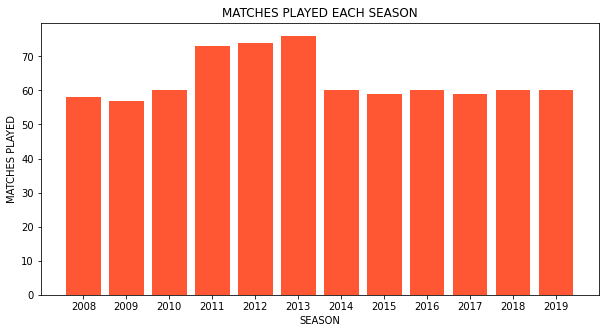

In [ ]:
plt.gcf().set_size_inches(10,5)
plt.xlabel('SEASON')
plt.ylabel('MATCHES PLAYED')
plt.title('MATCHES PLAYED EACH SEASON')
plt.bar(season, values, color = '#FF5733')
plt.xticks(season)
plt.show()

In [ ]:
ManOfTheMatch = matches.iloc[:, 13]
players = ManOfTheMatch.value_counts().head(30).keys().tolist()
runs = ManOfTheMatch.value_counts().head(30).tolist()
print('Man of the match {man}\nRuns{run}'.format(man = players, run = runs))

Man of the match ['CH Gayle', 'AB de Villiers', 'DA Warner', 'MS Dhoni', 'RG Sharma', 'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'AM Rahane', 'MEK Hussey', 'V Kohli', 'A Mishra', 'AD Russell', 'DR Smith', 'V Sehwag', 'JH Kallis', 'KA Pollard', 'AT Rayudu', 'SE Marsh', 'SP Narine', 'RA Jadeja', 'SR Tendulkar', 'UT Yadav', 'Harbhajan Singh', 'Rashid Khan', 'AC Gilchrist', 'RV Uthappa', 'HH Pandya', 'BJ Hodge']
Runs[21, 20, 17, 17, 17, 16, 15, 14, 13, 12, 12, 12, 11, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 6]


PIE CHART TO REPRESENT MAN OF THE MATCH 

Text(0.5, 1.0, 'MAN OF THE MATCH STATISTICS IN PIE CHART')

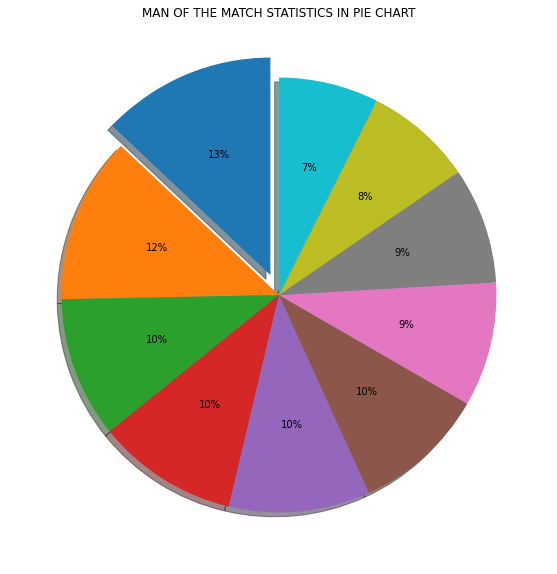

In [ ]:
#counting the number of man of the match awards received by each player
man_count = matches['player_of_match'].value_counts()

#plotting the data of top 10 players
plt.figure(figsize=(10,10))
plt.pie(pom_count.head(10), autopct='%.0f%%', explode=(0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0), shadow=True, startangle=90)
plt.title('MAN OF THE MATCH STATISTICS IN PIE CHART')

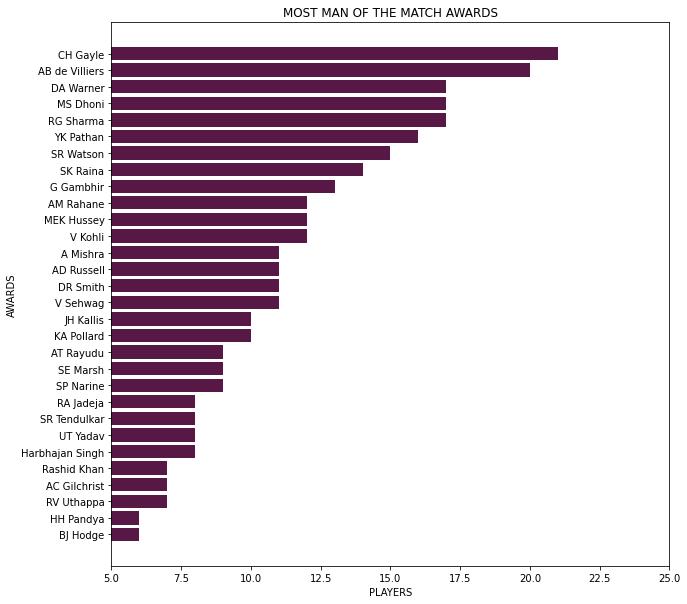

In [ ]:
plt.gcf().set_size_inches(10,10)
plt.xlabel('PLAYERS')
plt.ylabel('AWARDS')
plt.title('MOST MAN OF THE MATCH AWARDS')
plt.barh(players, runs, color = '#581845' )
plt.gca().invert_yaxis()
plt.xlim(5, 25)
plt.show()

## TOP SCORE (Batting)

In [ ]:
cricket = pd.read_csv('deliveries.csv')
cricket

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
# To Find the highest score by an individual IPL player
h_score = cricket.groupby(['batsman'])
player_runs = dict()

# For loop for sorting the higest score by each player
for batsman,group in result:
    runs = h_score.get_group(batsman).batsman_runs.sum()
    player_runs.setdefault(batsman,runs)
sort=sorted(player_runs.items(),reverse=True,key=lambda x: x[1])

# Empty dict to store values
batsman=[]
batsman_runs=[]

# Sorting out the best
for i in dict(sort).keys():
    batsman.append(i)
for i in dict(sort).values():
    batsman_runs.append(i)

Text(0.5, 1.0, 'RUNS BY AN INDIVIDUAL PLAYER')

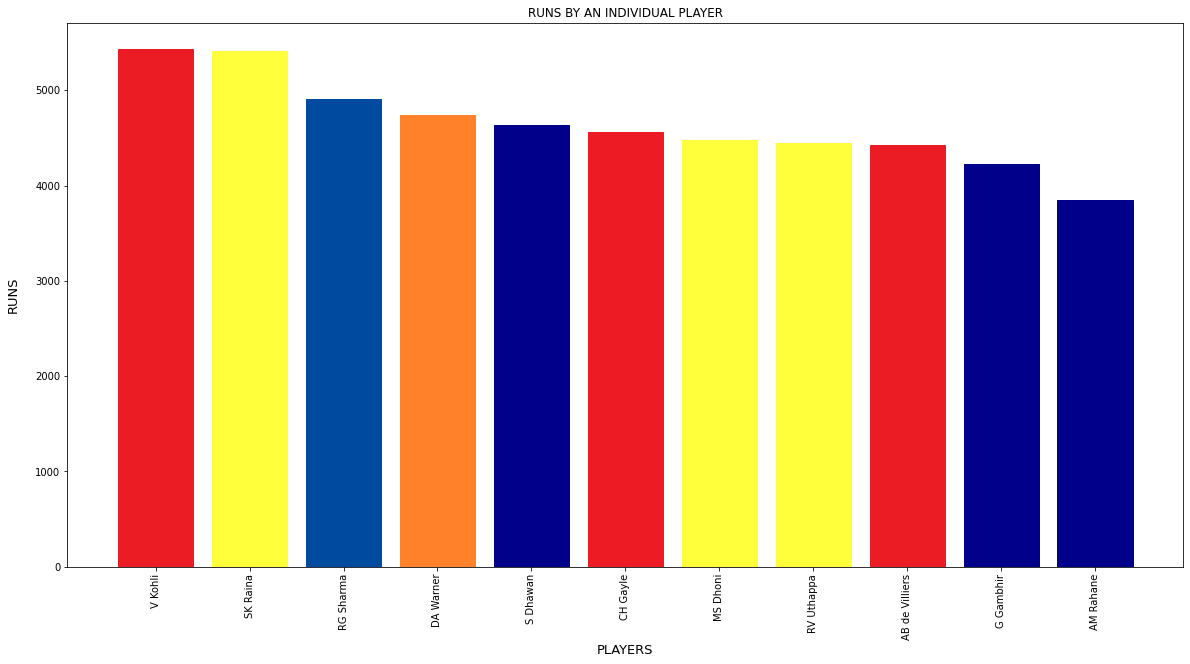

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
barplot=plt.bar(batsman[:11],batsman_runs[:11])

# Authentic Color of each teams (Eg: MS DHONI Team - CSK, Color - Yellow)
barplot[0].set_color('#EC1C24')
barplot[1].set_color('#FFFF3C')
barplot[2].set_color('#004BA0')
barplot[3].set_color('#FF822A')
barplot[4].set_color('#00008B')
barplot[5].set_color('#ED1B24')
barplot[6].set_color('#FFFF3C')
barplot[7].set_color('#FFFF3C')
barplot[8].set_color('#EC1C24')
barplot[9].set_color('#00008B')
barplot[10].set_color('#00008B')

plt.xlabel('PLAYERS',fontsize=13)
plt.ylabel('RUNS',labelpad=15,fontsize=13)
plt.title('RUNS BY AN INDIVIDUAL PLAYER')

# Highest wicket takers in the IPL

In [ ]:
wicket = cricket.loc[:, ['batsman', 'bowler', 'dismissal_kind']]
dismissal_kinds = [
 'caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (wicket['dismissal_kind'] == 'bowled') | (wicket['dismissal_kind'] == 'caught') | (wicket['dismissal_kind'] == 'caught and bowled') | (wicket['dismissal_kind'] == 'stumped') | (wicket['dismissal_kind'] == 'lbw') | (wicket['dismissal_kind'] == 'hit wicket')
bowler_data = wicket[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().head(10).keys().tolist()
wickets = bowler_data['bowler'].value_counts().head(10).tolist()
print('Bowler {bowl}\nWickets{wick}'.format(bowl = bowler, wick = wickets))

Bowler ['SL Malinga', 'A Mishra', 'Harbhajan Singh', 'PP Chawla', 'DJ Bravo', 'B Kumar', 'R Ashwin', 'SP Narine', 'UT Yadav', 'RA Jadeja']
Wickets[170, 156, 150, 149, 147, 133, 125, 122, 119, 108]


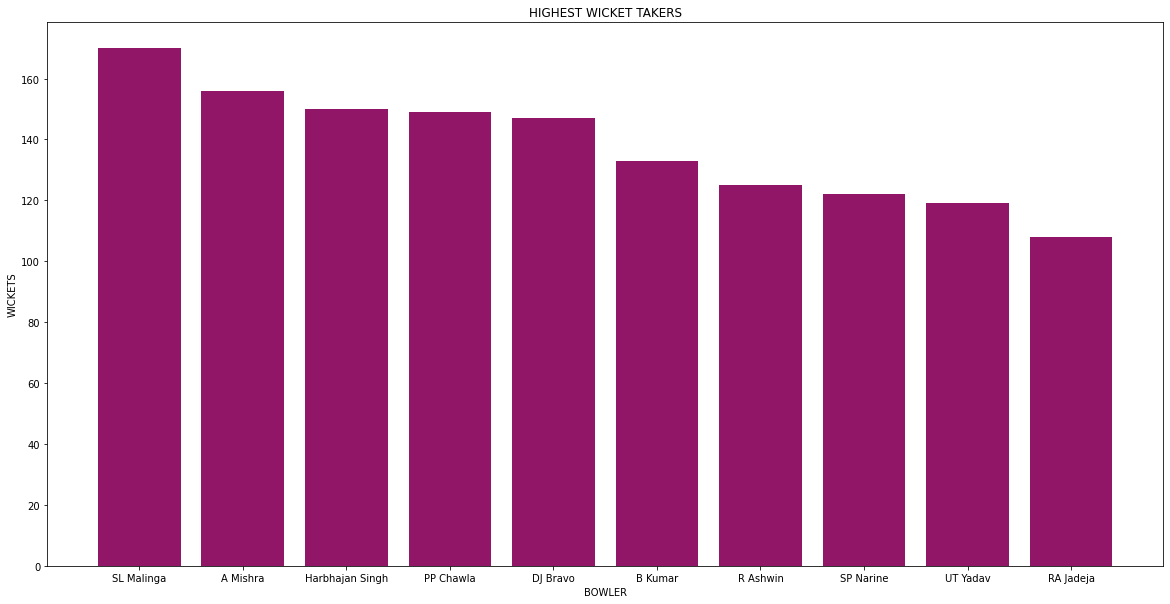

In [ ]:
plt.gcf().set_size_inches(20,10)
plt.xlabel('BOWLER')
plt.ylabel('WICKETS')
plt.title('HIGHEST WICKET TAKERS')
plt.bar(bowler, wickets, color = '#911668')
plt.show()

# Top 10 Stadiums

In [ ]:
#finding the top 10 stadiums with maximum match counts 
count_stadium=matches['venue'].value_counts().head(20)
stadium_names=matches['venue'].value_counts().head(20).index.tolist()

Text(0.5, 1.0, 'STADIUM-MATCH OCCURENCE')

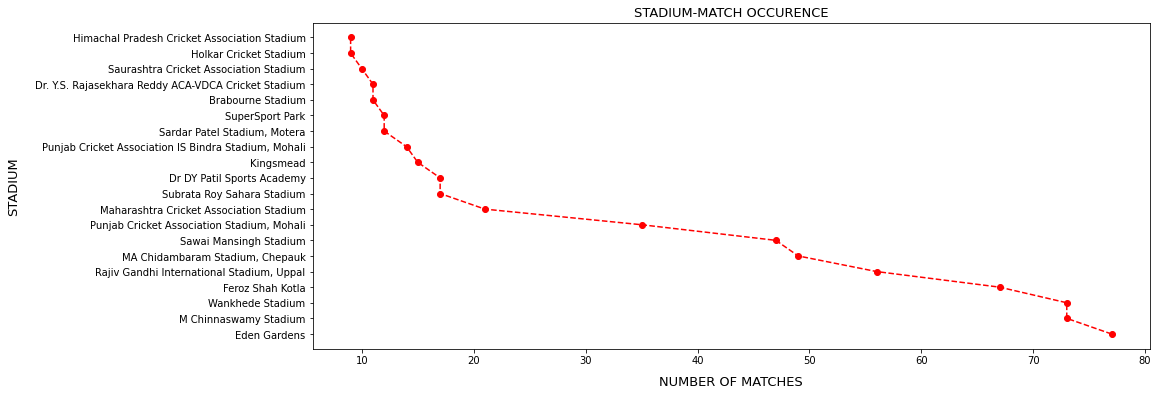

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(count_stadium,stadium_names,'r--',marker='o')
plt.tick_params(axis='x',which='major' ,labelsize=10)
plt.tick_params(axis='y',which='major' ,labelsize=10)
plt.ylabel('STADIUM',labelpad=15,fontsize=13)
plt.xlabel('NUMBER OF MATCHES',labelpad=10,fontsize=13)
plt.title('STADIUM-MATCH OCCURENCE',fontsize=13)